In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('logistic_train.csv')
test = pd.read_csv('logistic_test.csv')

<AxesSubplot:xlabel='product', ylabel='num_sold'>

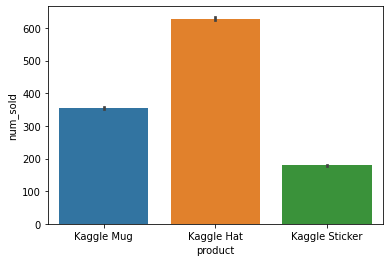

In [3]:
sns.barplot(x=train['product'], y=train['num_sold'])

In [4]:
mean = train.num_sold.mean()
for i in range(len(train)) :
    if(train.num_sold.iloc[i]>mean) :
        train.num_sold.iloc[i] = 1
    else :
        train.num_sold.iloc[i] = 0

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
data = [train,test]
data = pd.concat(data)

In [9]:
data

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,0.0
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,1.0
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,0.0
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,1.0
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,1.0
...,...,...,...,...,...,...
6565,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat,NaN
6566,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker,NaN
6567,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug,NaN
6568,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat,NaN


In [10]:
data = data.drop(['row_id','date'],axis=1)
data.head(3)

,country,store,product,num_sold
0,Finland,KaggleMart,Kaggle Mug,0.0
1,Finland,KaggleMart,Kaggle Hat,1.0
2,Finland,KaggleMart,Kaggle Sticker,0.0


In [11]:
features = data.drop('num_sold',axis=1)
label = data.num_sold

In [12]:
newCols = pd.get_dummies(features, drop_first=True)
newCols.head(3)

,country_Norway,country_Sweden,store_KaggleRama,product_Kaggle Mug,product_Kaggle Sticker
0,0,0,0,1,0
1,0,0,0,0,0
2,0,0,0,0,1


In [13]:
x_train = newCols[0 : 26298]
y_train = label[0 : 26298]
x_test = newCols[26298 :]
y_test = label[26298 : ]

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train , y_train)

LogisticRegression()

In [16]:
print('Training accuracy : ' , clf.score(x_train , y_train))

Training accuracy :  0.8991178036352574


In [17]:
pred = clf.predict(x_test)
pred

array([0., 0., 0., ..., 1., 1., 0.])

# House Price Prediction

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
train = pd.read_csv('train_.csv')
test = pd.read_csv('test_.csv')

In [20]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
test['SalePrice'] = 0

In [22]:
data = [train,test]
data = pd.concat(data)

In [23]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value = pd.DataFrame({'column': data.columns,'percent_missing': percent_missing})
missing_value.sort_values('percent_missing', ascending=False)
missing_value.sort_values(by=['percent_missing'], inplace=True, ascending=False)
missing_value.head()

,column,percent_missing
PoolQC,PoolQC,99.657417
MiscFeature,MiscFeature,96.402878
Alley,Alley,93.216855
Fence,Fence,80.438506
FireplaceQu,FireplaceQu,48.646797


In [24]:
dropCols = missing_value["column"][missing_value["percent_missing"]>47.0]
dropCols 

PoolQC              PoolQC
MiscFeature    MiscFeature
Alley                Alley
Fence                Fence
FireplaceQu    FireplaceQu
Name: column, dtype: object

In [25]:
data.drop(columns = dropCols , inplace = True)

In [26]:
data = data.fillna(data.mean())

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [27]:
corr_matrix = data.corr()
corr_matrix[0:5]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.025235,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025126,-0.016945,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.739838
MSSubClass,0.008931,1.000000,-0.390118,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005422,-0.064302,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.036083
LotFrontage,-0.025235,-0.390118,1.000000,0.364382,0.204190,-0.068350,0.116905,0.085608,0.202210,0.203603,...,0.106380,0.152160,0.010541,0.025255,0.069348,0.160857,0.035762,0.010337,-0.007265,0.153477
LotArea,-0.040746,-0.201730,0.364382,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125354,0.194021,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.162122
OverallQual,-0.029771,0.033638,0.204190,0.100541,1.000000,-0.093847,0.597554,0.571532,0.430961,0.281704,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.295558


In [29]:
corr_matrix["SalePrice"].abs().sort_values(ascending=False)

SalePrice        1.000000
Id               0.739838
GrLivArea        0.299150
OverallQual      0.295558
TotRmsAbvGrd     0.242075
TotalBsmtSF      0.238725
GarageCars       0.234974
GarageArea       0.231269
1stFlrSF         0.229243
YearRemodAdd     0.211347
FullBath         0.203831
Fireplaces       0.194668
YearBuilt        0.193199
MasVnrArea       0.186196
GarageYrBlt      0.182210
LotArea          0.162122
LotFrontage      0.153477
BsmtFinSF1       0.148442
2ndFlrSF         0.142117
WoodDeckSF       0.123457
HalfBath         0.110381
OpenPorchSF      0.105112
BsmtUnfSF        0.092944
BsmtFullBath     0.076426
BedroomAbvGr     0.068632
EnclosedPorch    0.060763
MoSold           0.051323
PoolArea         0.050913
3SsnPorch        0.046599
KitchenAbvGr     0.043996
MSSubClass       0.036083
ScreenPorch      0.026102
OverallCond      0.020809
BsmtHalfBath     0.019363
BsmtFinSF2       0.019285
MiscVal          0.017902
LowQualFinSF     0.011061
YrSold           0.003983
Name: SalePr

In [30]:
numericalData = data[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','1stFlrSF','TotalBsmtSF','FullBath', 'TotRmsAbvGrd','YearBuilt','YearRemodAdd']]
numericalData.head(3)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2.0,548.0,856,856.0,2,8,2003,2003
1,181500,6,1262,2.0,460.0,1262,1262.0,2,6,1976,1976
2,223500,7,1786,2.0,608.0,920,920.0,2,6,2001,2002


In [33]:
categoricalData = data.select_dtypes(include=['object']).copy()

In [34]:
categoricalData = categoricalData[['Street','SaleCondition','HouseStyle']]
categoricalData.head(3)

,Street,SaleCondition,HouseStyle
0,Pave,Normal,2Story
1,Pave,Normal,1Story
2,Pave,Normal,2Story


In [35]:
newCols = pd.get_dummies(categoricalData, columns=['Street','SaleCondition','HouseStyle'], drop_first=True)
newCols

,Street_Pave,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,1,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1,0,0,0,1,0,0,0,0,0,1,0,0
1455,1,0,0,0,0,0,0,0,0,0,1,0,0
1456,1,0,0,0,0,0,0,1,0,0,0,0,0
1457,1,0,0,0,1,0,0,0,0,0,0,1,0


In [36]:
newData = pd.concat([numericalData,newCols],axis = 1)
newData.head(3)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,...,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,208500,7,1710,2.0,548.0,856,856.0,2,8,2003,...,0,1,0,0,0,0,0,1,0,0
1,181500,6,1262,2.0,460.0,1262,1262.0,2,6,1976,...,0,1,0,0,1,0,0,0,0,0
2,223500,7,1786,2.0,608.0,920,920.0,2,6,2001,...,0,1,0,0,0,0,0,1,0,0


In [37]:
from scipy import stats
outliers = len(newData)- len(newData[(np.abs(stats.zscore(newData)) < 3).all(axis=1)])
print("Number of outliers : " , outliers)

Number of outliers :  646


In [38]:
newData = pd.DataFrame(newData[(np.abs(stats.zscore(newData)) < 3).all(axis=1)])
newData.shape

(2273, 24)

In [39]:
train_set = newData[0:1043]
test_set = newData[1043 : ]

In [40]:
scaled_train_set = pd.DataFrame(StandardScaler().fit_transform(train_set), columns = train_set.columns)
scaled_train_set.head(3)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,...,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,0.594974,0.798205,0.534511,0.436075,0.505425,-0.785963,-0.439970,0.920684,1.116712,1.166092,...,0.0,0.286269,0.0,0.0,-1.093522,0.0,0.0,1.41625,0.0,0.0
1,0.163996,0.023761,-0.475852,0.436075,0.047058,0.412775,0.630992,0.920684,-0.269872,0.231060,...,0.0,0.286269,0.0,0.0,0.914477,0.0,0.0,-0.70609,0.0,0.0
2,0.834406,0.798205,0.705912,0.436075,0.817947,-0.597000,-0.271148,0.920684,-0.269872,1.096830,...,0.0,0.286269,0.0,0.0,-1.093522,0.0,0.0,1.41625,0.0,0.0


In [41]:
x_train = scaled_train_set.drop('SalePrice',axis=1)
y_train =  scaled_train_set.SalePrice

In [42]:
x_test = test_set.drop('SalePrice',axis=1)
y_test =  test_set.SalePrice
scaled_x_test = pd.DataFrame(StandardScaler().fit_transform(x_test), columns = x_test.columns)
scaled_x_test.head(3)

,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,-0.690117,-1.346851,-0.954090,-0.824901,-0.727461,-0.396402,-1.004384,-0.927694,0.113805,-0.499708,...,0.0,0.269003,0.0,0.0,0.902308,0.0,0.0,-0.678828,0.0,0.0
1,-1.428884,-1.328513,3.149164,0.136044,-0.704547,-0.411733,-1.004384,-0.927694,0.080500,-0.547381,...,0.0,0.269003,0.0,0.0,0.902308,0.0,0.0,-0.678828,0.0,0.0
2,0.048651,-0.773783,0.413661,0.616517,-0.011396,0.242404,-1.004384,-0.211845,1.146250,1.025811,...,0.0,0.269003,0.0,0.0,0.902308,0.0,0.0,-0.678828,0.0,0.0


### Multiple Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

multi_reg = LinearRegression()
multi_reg.fit(x_train , y_train)
print('Training Accuracy : ' , multi_reg.score(x_train, y_train)*100 , '%')

Training Accuracy :  83.98680290654255 %


### Lasso Regression

In [44]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(x_train,y_train)
print('Training Accuracy : ' , lasso_reg.score(x_train, y_train)*100 , '%')

Training Accuracy :  80.9437163939315 %


### Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=400, max_features=5, max_depth=6)
rf_reg.fit(x_train, y_train)
print('Training Accuracy : ' , rf_reg.score(x_train, y_train)*100 , '%')

Training Accuracy :  89.60732520493724 %
